In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

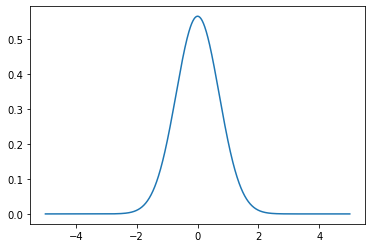

In [2]:
Gamma = 1
Omega = 2*np.pi
beta = 1
x = np.linspace(-5,5,1000)
t = np.linspace(0,5, 4000)
plt.plot(x,np.sqrt(beta/np.pi)*np.exp(-beta*x**2))

<Figure size 720x720 with 0 Axes>

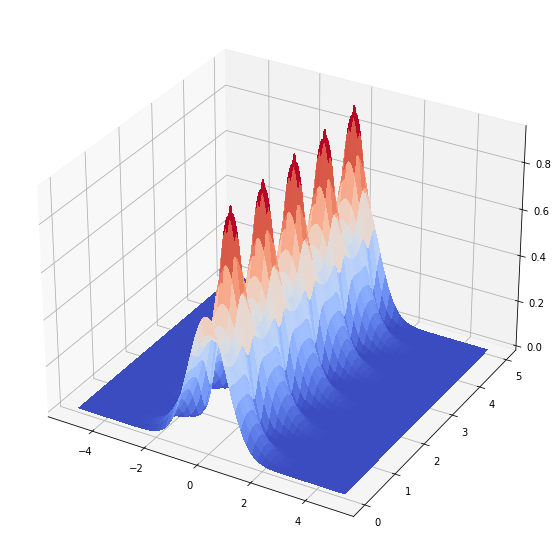

In [3]:
plt.figure(figsize=(10,10))
X,T = np.meshgrid(x,t)
u = 1/(np.pi)*np.exp(-beta*X**2/(4*Gamma/Omega*beta*np.sin(Omega*T)+1))*np.sqrt(np.pi*beta)/np.sqrt(4*Gamma/Omega*np.sin(Omega*T)+1)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

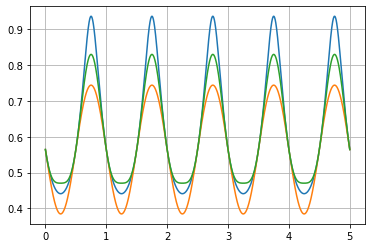

In [207]:
y = 4*Gamma/Omega*beta*np.sin(Omega*t)
#plt.plot(t,u[:,499])
#plt.plot(t,u[:,498])
plt.plot(t, np.sqrt(beta/np.pi/(4*beta*Gamma/Omega*np.sin(Omega*t)+1)))

plt.plot(t, np.sqrt(beta/np.pi)*(1-0.5*y))

plt.plot(t, np.sqrt(beta/np.pi)*(1-0.5*y+0.5*(-0.5)*(-1.5)*y**2))

#plt.plot(t, np.sqrt(beta/np.pi)*(1-0.5*y+0.5*(-0.5)*(-1.5)*y**2+1/6*(-0.5)*(-1.5)*(-2.5)*y**3))

#plt.plot(t, np.sqrt(beta/np.pi)*(1-0.5*y+0.5*(-0.5)*(-1.5)*y**2+1/6*(-0.5)*(-1.5)*(-2.5)*y**3+1/24*(-0.5)*(-1.5)*(-2.5)*(-3.5)*y**4))

plt.grid()

## Wavelet Initial Conditions

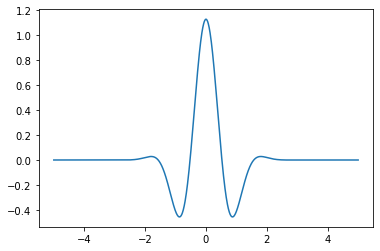

In [195]:
gamma = 3
ic_wavelet = 2*np.cos(gamma*x)*np.exp(-beta*x**2)*np.sqrt(beta/np.pi)
plt.plot(x, ic_wavelet)
alpha = np.sin(Omega*T)/Omega
denom = 4*alpha*beta+1

In [196]:
u_wavelet = 2*np.sqrt(beta/np.pi)/np.sqrt(denom)*np.exp(-beta*X**2/(denom)-gamma**2*alpha/denom)*np.cos(gamma*X/(denom))






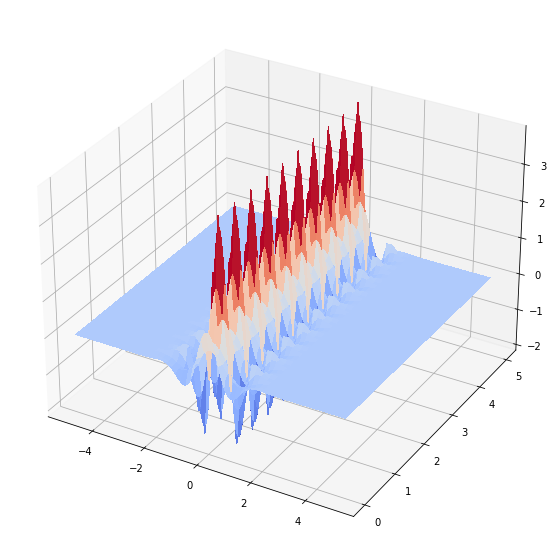

In [197]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))
surf = ax.plot_surface(X,T,u_wavelet,cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
plt.show()

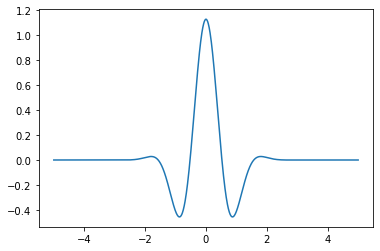

In [198]:
plt.plot(x,u_wavelet[0,:])

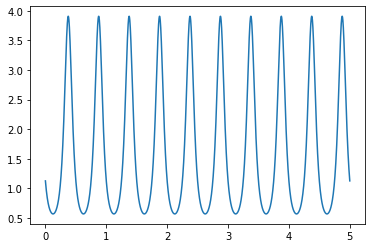

In [199]:
plt.plot(t,u_wavelet[:,500])

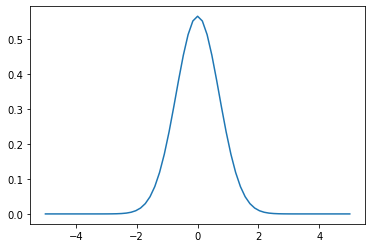

In [376]:
## Numerical stuff, first an explicit scheme
#Discretize 
Nx = 65
Nt = 250
t_ = np.linspace(0,2.5, Nt)
x_ = np.linspace(-5,5,Nx)
dx = x_[1]-x_[0]; dt = t_[1]-t_[0]

D_ = Gamma*np.cos(Omega*t_)
u_ = np.zeros((Nt, Nx))
u_[0,:] = np.exp(-beta*x_**2)*np.sqrt(beta/np.pi)
plt.plot(x_,u_[0,:])
# in this case it is best to have Neumann BCs at both ends
for j,time in enumerate(t_[:-1]):
    u_[j+1,:] = dt/dx**2*D_[j]*(-2*u_[j,:] + np.roll(u_[j,:], 1) + np.roll(u_[j,:], -1))+ u_[j,:]
    

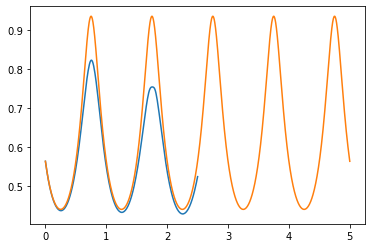

In [377]:
plt.plot(t_, u_[:, np.argmin(abs(x_))])
plt.plot(t,u[:,np.argmin(abs(x))])

In [378]:
##we need an implicit scheme!!
#building the matrix, we need to do it at each time step
import scipy.linalg
vector = np.zeros(Nx)
vector[0] = 3
vector[1] = -1
K=scipy.linalg.toeplitz(vector)
K[0,1] += -1
K[-1,Nx-2] += -1
K

array([[ 3., -2.,  0., ...,  0.,  0.,  0.],
       [-1.,  3., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  3., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  3., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  3., -1.],
       [ 0.,  0.,  0., ...,  0., -2.,  3.]])

In [490]:
Nx = 90
Nt = 6050
t_ = np.linspace(0,5, Nt)
x_ = np.linspace(-10,10,Nx)
dx = x_[1]-x_[0]; dt = t_[1]-t_[0]

D_ = Gamma*np.cos(Omega*t_)
u_ = np.zeros((Nt, Nx))
u_[0,:] = np.exp(-beta*x_**2)*np.sqrt(beta/np.pi)
factor1 = dt/(dx)**2
for j,time in enumerate(t_[:-1]):
    D_j = D_[j]
    vector = np.zeros(Nx)
    vector[0] = factor1*D_j*2+1
    vector[1] = -factor1*D_j
    K=scipy.linalg.toeplitz(vector)
    K[0,1] *= 2
    K[-1,Nx-2] *= 2
    u_[j+1,:] = scipy.linalg.solve(K, u_[j,:])
    

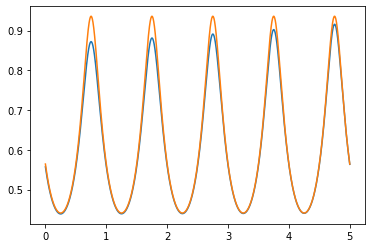

In [491]:
plt.plot(t_, u_[:, np.argmin(abs(x_))])
plt.plot(t,u[:,np.argmin(abs(x))])

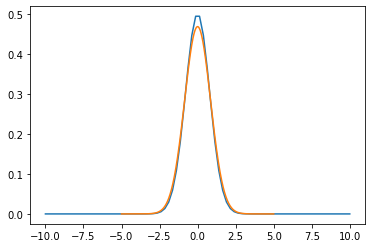

In [469]:
plt.plot(x_, u_[100,:])
plt.plot(x, u[100,:])

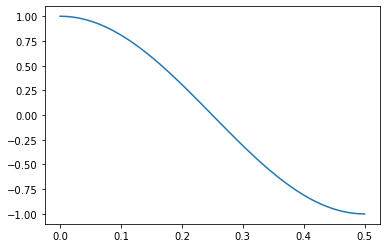

In [454]:
plt.plot(t_,D_)